<a href="https://colab.research.google.com/github/titaniumsyrup/learners_space/blob/week2/task2week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import shutil
import os

source_dataset_path = '/content/drive/MyDrive/Copy of car'

local_dataset_path = '/content/car'
if not os.path.exists(local_dataset_path):
    shutil.copytree(source_dataset_path, local_dataset_path)
else:
    print(f"Dataset already exists at {local_dataset_path}")

if not os.path.exists(local_dataset_path):
    shutil.copytree(source_dataset_path, local_dataset_path)


In [10]:
import yaml

data_yaml_path = os.path.join(local_dataset_path, '/content/car/data.yaml')

with open(data_yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)

data_yaml['train'] = os.path.join(local_dataset_path, '/content/car/train/images')
data_yaml['val'] = os.path.join(local_dataset_path, '/content/car/valid/images')
data_yaml['test'] = os.path.join(local_dataset_path, '/content/car/test/images')

with open(data_yaml_path, 'w') as file:
    yaml.safe_dump(data_yaml, file)

print("Updated data.yaml paths:")
print(data_yaml)


Updated data.yaml paths:
{'names': ['boot', 'car', 'door', 'front_bumper', 'front_grill', 'front_windshield', 'headlamp', 'hood', 'license_plate', 'panel', 'rear_bumper', 'rear_windshield', 'sideview_mirror', 'taillamp', 'wheel', 'window'], 'nc': 16, 'roboflow': {'license': 'CC BY 4.0', 'project': 'body-parts-cq3al', 'url': 'https://universe.roboflow.com/ae-43fv6/body-parts-cq3al/dataset/2', 'version': 2, 'workspace': 'ae-43fv6'}, 'test': '/content/car/test/images', 'train': '/content/car/train/images', 'val': '/content/car/valid/images'}


In [12]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(data=data_yaml_path, epochs=20, imgsz=64, cache=False)


Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/car/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /content/car/train/labels.cache... 1509 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1509/1509 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/car/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

Plotting labels to runs/detect/train5/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.957      4.506       1.43         41         64: 100%|██████████| 95/95 [01:06<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        160       1055      0.992     0.0504     0.0592     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.843      3.529      1.277         71         64: 100%|██████████| 95/95 [00:58<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        160       1055      0.854     0.0618     0.0767     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.849      3.034      1.215         49         64: 100%|██████████| 95/95 [00:57<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        160       1055      0.787     0.0973      0.123     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.773      2.613       1.18         55         64: 100%|██████████| 95/95 [00:57<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        160       1055      0.423      0.178      0.147     0.0766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.779       2.24      1.155         63         64: 100%|██████████| 95/95 [00:57<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        160       1055      0.181      0.158       0.15     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G       1.71       1.97      1.133         65         64: 100%|██████████| 95/95 [00:59<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        160       1055      0.247      0.162      0.164     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.657      1.779      1.112         68         64: 100%|██████████| 95/95 [00:59<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        160       1055      0.293      0.207      0.205      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.621      1.695      1.108         51         64: 100%|██████████| 95/95 [00:58<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        160       1055      0.317      0.264      0.216      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.549      1.596      1.094         79         64: 100%|██████████| 95/95 [00:58<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        160       1055      0.337      0.237      0.229      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.519       1.49      1.085         79         64: 100%|██████████| 95/95 [00:59<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        160       1055      0.345       0.29      0.242      0.125


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.474      1.356      1.095         35         64: 100%|██████████| 95/95 [00:46<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        160       1055      0.321      0.338      0.269      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.385      1.232      1.071         26         64: 100%|██████████| 95/95 [00:43<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        160       1055       0.36      0.323      0.281      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G       1.34      1.155       1.06         31         64: 100%|██████████| 95/95 [00:42<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        160       1055      0.375       0.32      0.285      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.272      1.092      1.036         35         64: 100%|██████████| 95/95 [00:42<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        160       1055      0.383      0.353      0.292      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.251      1.053      1.031         32         64: 100%|██████████| 95/95 [00:42<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        160       1055      0.432      0.355      0.315       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.208      1.022      1.021         34         64: 100%|██████████| 95/95 [00:41<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        160       1055       0.45       0.38      0.334      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.183     0.9717       1.01         42         64: 100%|██████████| 95/95 [00:42<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        160       1055      0.426      0.404      0.327      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.171      0.984      1.016         30         64: 100%|██████████| 95/95 [00:42<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        160       1055      0.437      0.395      0.331      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.144     0.9574      1.006         20         64: 100%|██████████| 95/95 [00:42<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        160       1055      0.444      0.409      0.334      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.166     0.9466      1.001         37         64: 100%|██████████| 95/95 [00:42<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        160       1055      0.445       0.41      0.336      0.168



20 epochs completed in 0.306 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]


                   all        160       1055      0.437      0.397      0.332      0.172
                  boot         35         39        0.2      0.128      0.162      0.051
                   car        142        145      0.751      0.979      0.938      0.767
                  door         50         52      0.443      0.635      0.517      0.243
          front_bumper         30         30      0.222      0.433      0.216     0.0762
           front_grill         49         51      0.385      0.373      0.336      0.134
      front_windshield         54         56      0.537      0.804      0.689      0.416
              headlamp         76        117      0.366      0.299      0.244     0.0718
                  hood         50         50      0.517      0.513      0.447      0.188
         license_plate        114        117      0.403      0.173      0.157     0.0655
                 panel         17         18      0.124      0.167     0.0721     0.0131
           rear_bumpe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7984b938ec50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044

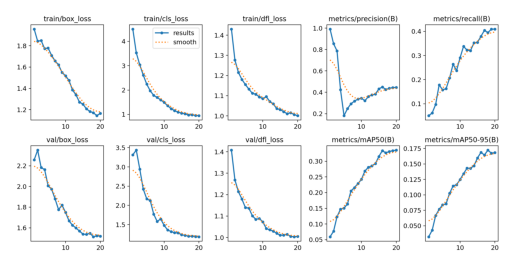

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


results_path = '/content/runs/detect/train5/results.png'
img = mpimg.imread(results_path)
plt.imshow(img)
plt.axis('off')
plt.show()


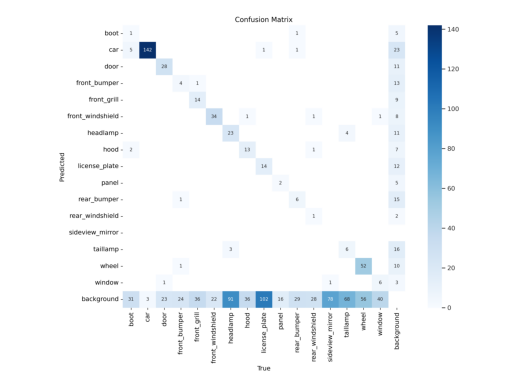

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the confusion matrix
confusion_matrix_path = '/content/runs/detect/train52/confusion_matrix.png'
img = mpimg.imread(confusion_matrix_path)
imgplot = plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
